In [108]:
import pandas as pd

df = pd.read_csv('Document from George.csv')
df['Order date'] = pd.to_datetime(df['Order date'])
df['Delivery date'] = pd.to_datetime(df['Delivery date'])
#changed the dates to python datetime
df['time_diff_days'] = ( df['Delivery date'] - df['Order date']) / pd.Timedelta(days=1)

#difference between the order and delivery in minutes
df['time_diff'] = ( df['Delivery date'] - df['Order date'])
df

,Unnamed: 0,Warehouse,Order date,Delivery date,Customer,Zipcode,time_diff_days,time_diff
0,0,Butler,2021-02-09 10:49:00,2021-02-11 12:40:00,12392,15017,2.077083,2 days 01:51:00
1,1,Butler,2021-02-12 08:59:00,2021-02-15 16:12:00,12392,15017,3.300694,3 days 07:13:00
2,2,Washington,2021-02-12 09:01:00,2021-02-15 16:15:00,12392,15017,3.301389,3 days 07:14:00
3,3,McKees Rocks,2021-02-13 07:45:00,2021-02-15 16:16:00,12392,15017,2.354861,2 days 08:31:00
4,5,Butler,2021-02-15 21:58:00,2021-02-16 16:50:00,12392,15017,0.786111,0 days 18:52:00
...,...,...,...,...,...,...,...,...
9475,10472,Washington,2022-11-12 18:43:00,2022-11-12 19:01:00,288530,15217,0.012500,0 days 00:18:00
9476,10473,Pittsburgh Mills,2022-11-12 19:48:00,2022-11-12 19:48:00,227364,15112,0.000000,0 days 00:00:00
9477,10474,Butler,2022-11-12 20:02:00,2022-11-12 20:02:00,270991,15216,0.000000,0 days 00:00:00
9478,10475,Pittsburgh Mills,2022-11-12 20:09:00,2022-11-12 20:09:00,98234,15217,0.000000,0 days 00:00:00


# 1. Total number of orders from each Zipcode per Month.

In [109]:
pd.options.display.max_columns = 4000
out = pd.crosstab(df['Zipcode'], pd.PeriodIndex(df['Order date'], freq='M'))
out

col_0,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11
Zipcode,,,,,,,,,,,,,,,,,,,,,,
15007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15017,8,4,6,3,14,5,3,4,2,0,4,21,18,17,17,18,19,16,15,6,10,2
15031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15044,0,0,9,9,8,12,8,12,11,16,19,13,11,13,16,22,27,12,27,20,26,26
15055,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,0,1,2,6,4,2,1
15057,0,0,0,0,8,3,1,1,2,2,0,1,0,0,1,2,13,3,13,11,6,2
15063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# 2. Percentage of customer returns within a week, a Month, 3 Months, 6 Months and a Year.

In [125]:
vf=df[df.Customer.duplicated(keep=False)]

sr = vf.groupby('Customer').head(2)

our = (vf.groupby('Customer', as_index=False)['Order date'].agg(lambda x: (x.iloc[-1] - x.iloc[0]).total_seconds()/ 60 ).query('`Order date` != 0'))
week = []
month = []
three_months = []
six_months = []
year = []
more_time = []
col = our['Order date'].tolist()
for i in col:
    if 0 <= i <= 10080:#week
        week.append(i)
    elif 10081 <= i <= 43800:#month131400
        month.append(i)
    elif 43801 <= i <= 131400:#3 months
        three_months.append(i)
    elif 131401 <= i <= 262800:#6 months
        six_months.append(i)
    elif 262801 <= i <= 525600:#year
        year.append(i)
    elif  i > 525600:#more_year
        more_time.append(i)
    
all_customers = len(df.Customer.unique())
return_customer  = len(our)
print('percentage of overall return customers',round(return_customer/all_customers *100),'%')
print('percentage of customers that returned within a week',round(len(week)/all_customers *100,1),'%')
print('percentage of customers that returned within a month',round(len(month)/all_customers *100,1),'%')
print('percentage of customers that returned within 3 months',round(len(three_months)/all_customers *100,1),'%')
print('percentage of customers that returned within 6 month',round(len(six_months)/all_customers *100,1),'%')
print('percentage of customers that returned within a year',round(len(year)/all_customers *100,1),'%')
#there are also a small perrcentage of customers that returned after a year

percentage of overall return customers 55 %
percentage of customers that returned within a week 8.2 %
percentage of customers that returned within a month 10.0 %
percentage of customers that returned within 3 months 13.4 %
percentage of customers that returned within 6 month 11.2 %
percentage of customers that returned within a year 7.1 %


# 3. Percentage of customer that never came back.

In [126]:
sf = df.drop_duplicates(subset = 'Customer',keep = False)

print('percentage of customers that never came back',round(len(sf) / len(df.Customer.unique()) * 100),'%')
#percentage of customers that only ordered once

percentage of customers that never came back 45 %


In [127]:
print('average delivery time for customers that came back',round(vf.time_diff_days.mean(),1),'days')

average delivery time for customers that came back 3.2 days


In [128]:
print('average delivery time for customers that never came back',round(sf.time_diff_days.mean(),1),'days')

average delivery time for customers that never came back 3.1 days


In [129]:
print("Conclusion: There isn't much correlation because the average delivery time for customers that returned is almost the same as those that didn't")

Conclusion: There isn't much correlation because the average delivery time for customers that returned is almost the same as those that didn't


# 4. How fast do orders get delivered by zipcode?

## Average delivery time for each Zipcode

In [137]:
pd.options.display.max_rows = 4000
wf = df.groupby('Zipcode')['time_diff_days'].mean().round(2)
wf = pd.DataFrame(wf)
print('the average delivery time is in days')
wf= wf.reset_index()
wf = wf.rename(columns = {'time_diff_days':'average time to deliver(days)'})
wf

the average delivery time is in days


,Zipcode,average time to deliver(days)
0,15007,1.78
1,15010,32.17
2,15017,2.46
3,15031,0.65
4,15035,2.99
5,15044,3.51
6,15055,3.15
7,15057,3.39
8,15063,5.05
9,15068,5.85


## How fast do orders get delivered by zipcode per month

In [177]:
import calendar

a = df.groupby([df.Zipcode,df['Order date'].dt.month])['time_diff_days'].mean().round(1)
b = pd.DataFrame(a)
c = b.reset_index()
d = c.rename(columns = {'Order date':'month','time_diff_days':'average time to deliver(days)'})
d['month'] = d['month'].apply(lambda x: calendar.month_abbr[x])
d

,Zipcode,month,average time to deliver(days)
0,15007,Nov,1.8
1,15010,Oct,32.2
2,15017,Jan,2.8
3,15017,Feb,2.5
4,15017,Mar,2.3
5,15017,Apr,2.4
6,15017,May,2.8
7,15017,Jun,2.2
8,15017,Jul,2.6
9,15017,Aug,2.1


# 5. From what warehouse do each Zipcode have the most deliveries?

In [173]:
s = df.groupby('Zipcode')['Warehouse'].apply(lambda x: x.value_counts()).reset_index()
s = s.rename(columns = {'level_1':'Warehouse','Warehouse':'Max Deliveries'})
s

,Zipcode,Warehouse,Max Deliveries
0,15007,Boardman,1
1,15010,Beaver Falls,1
2,15017,Washington,68
3,15017,Butler,46
4,15017,Pittsburgh Mills,37
5,15017,McKees Rocks,28
6,15017,Beaver,26
7,15017,Washington Big Box,7
8,15031,Washington,1
9,15035,Pittsburgh Mills,1


# 6. How fast does each zipcode grow with number of orders?
### The plots below show the number of orders made from each zipcode per month in bar charts, we have 97 zipcodes and each chart contains 5 Zipcodes, this is to make the plots clearer.

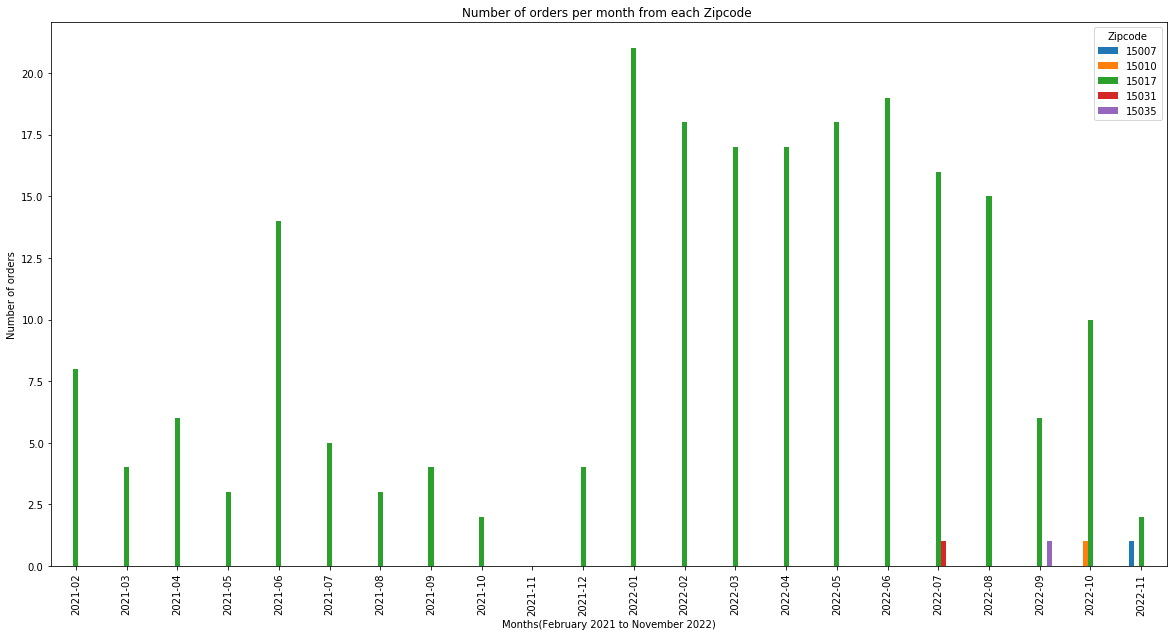

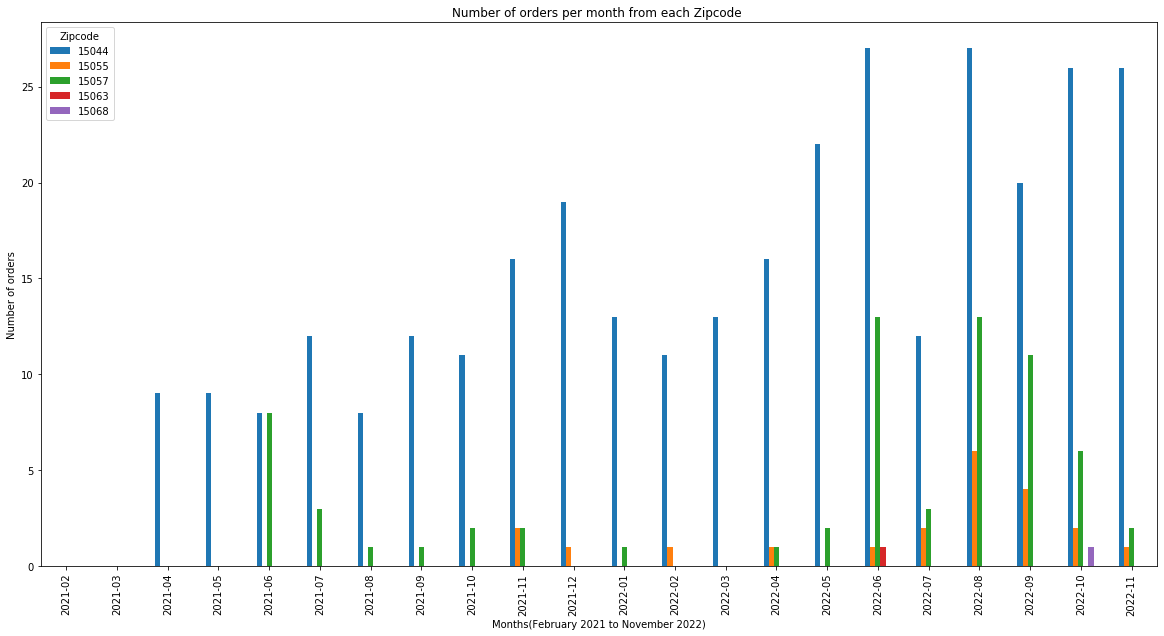

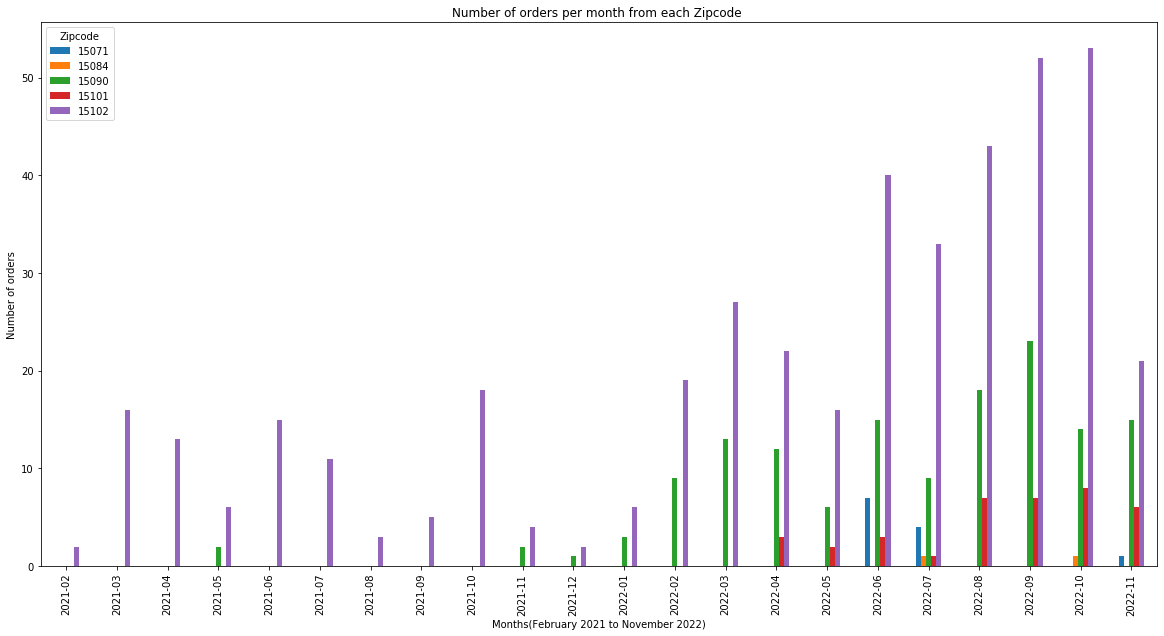

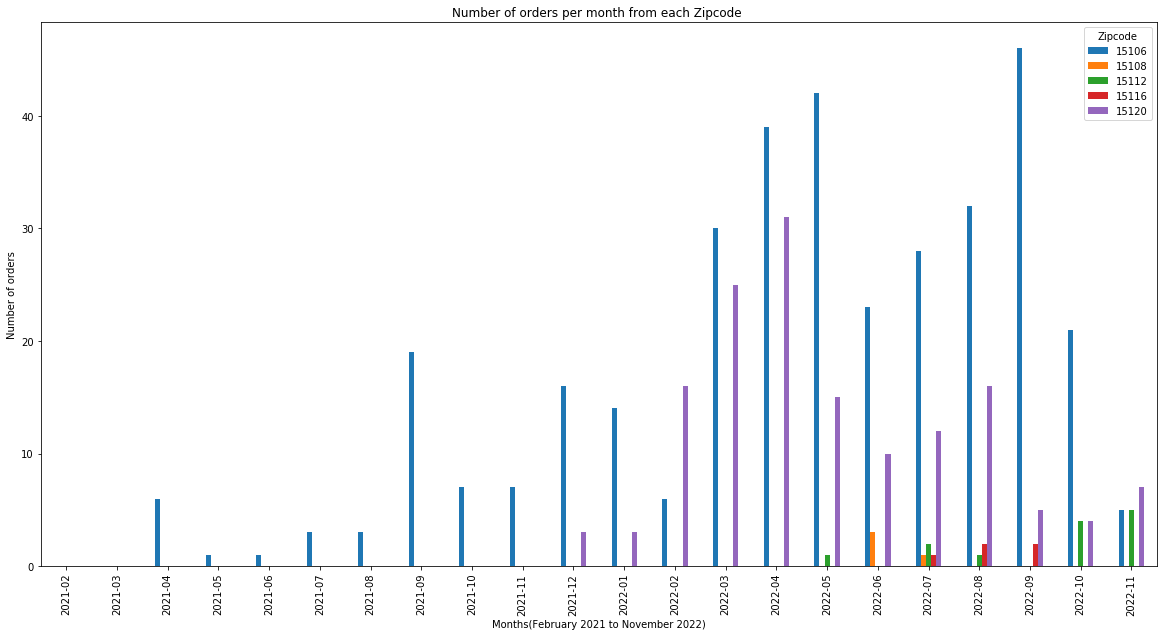

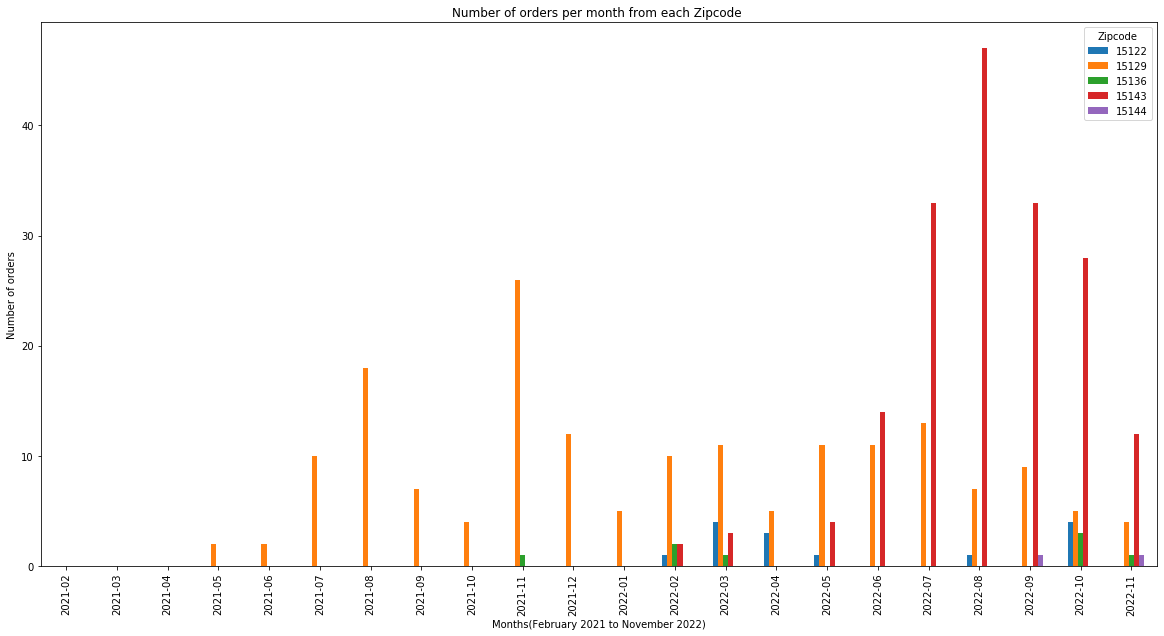

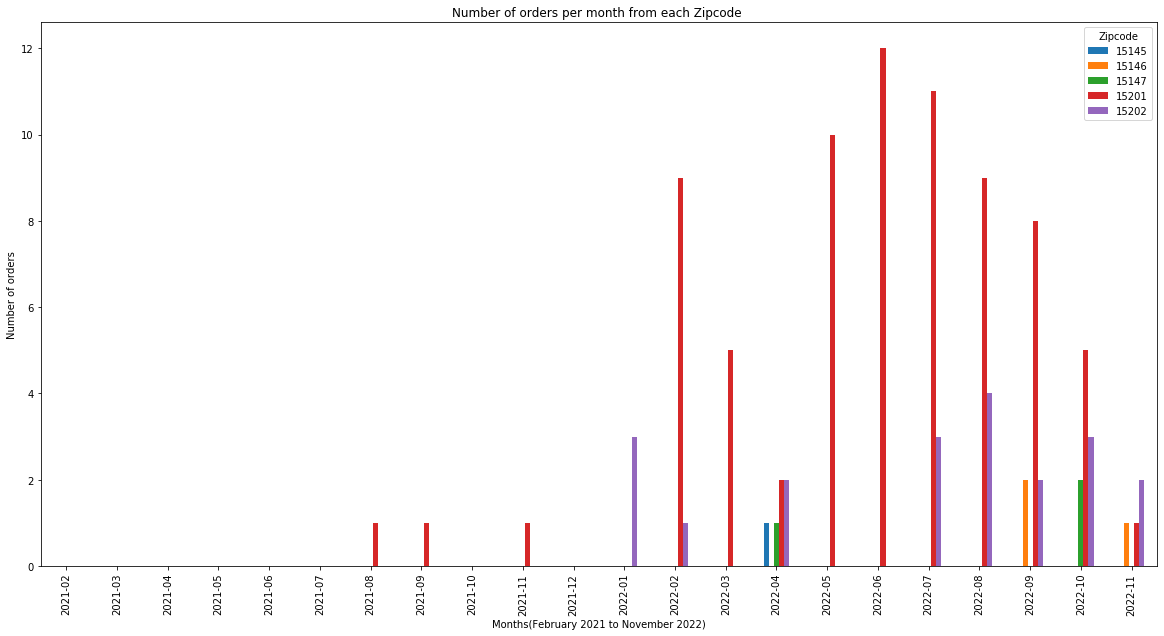

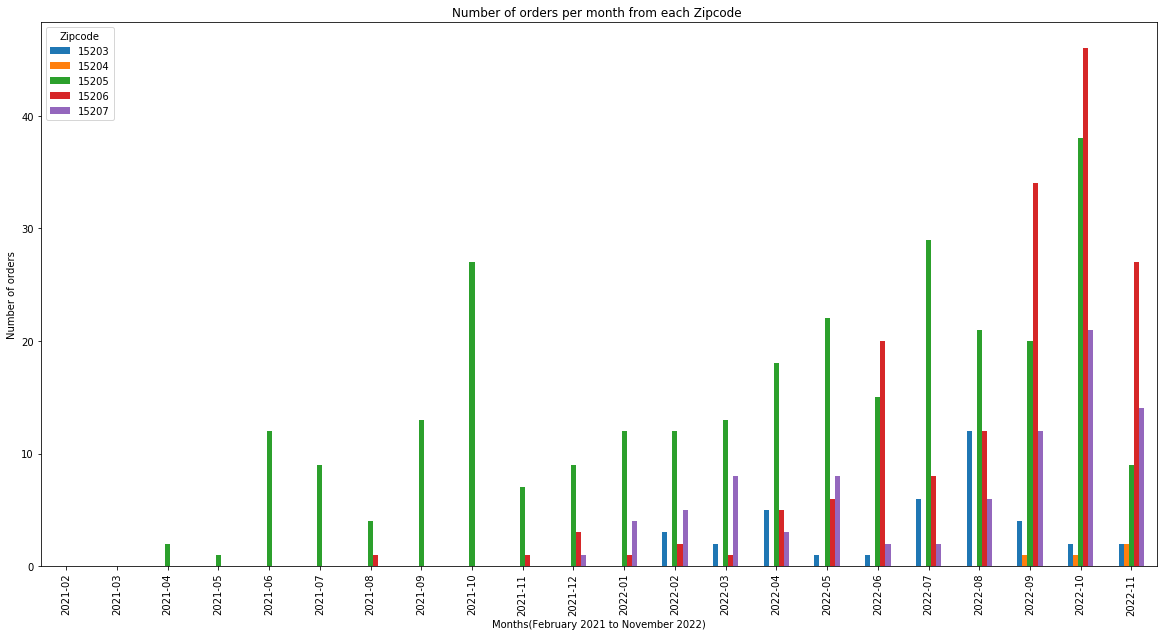

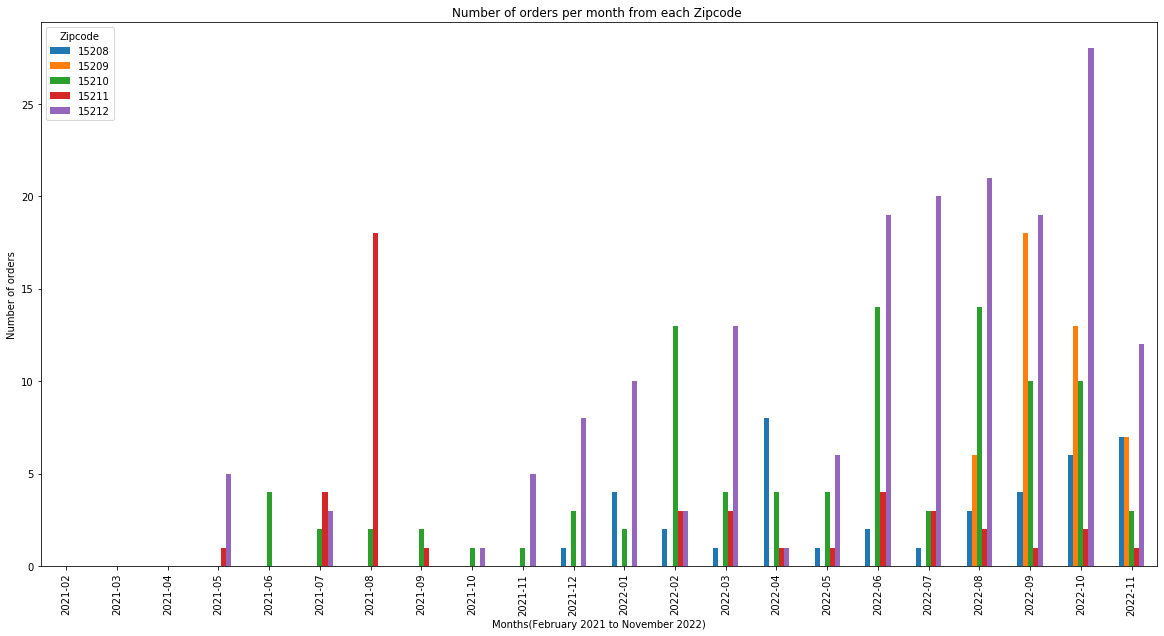

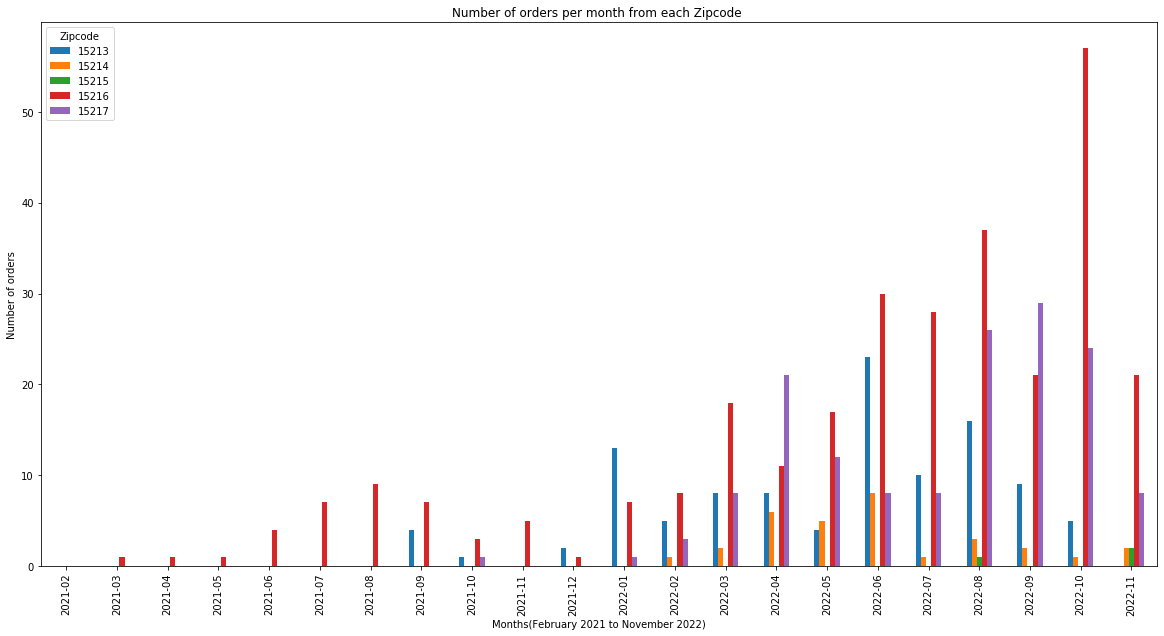

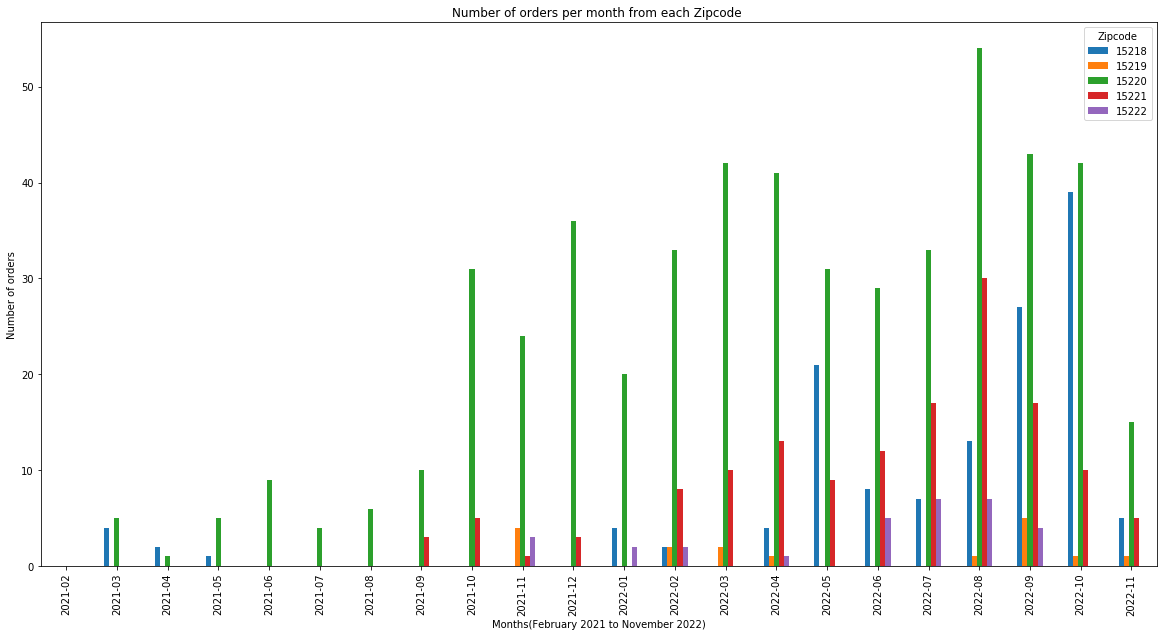

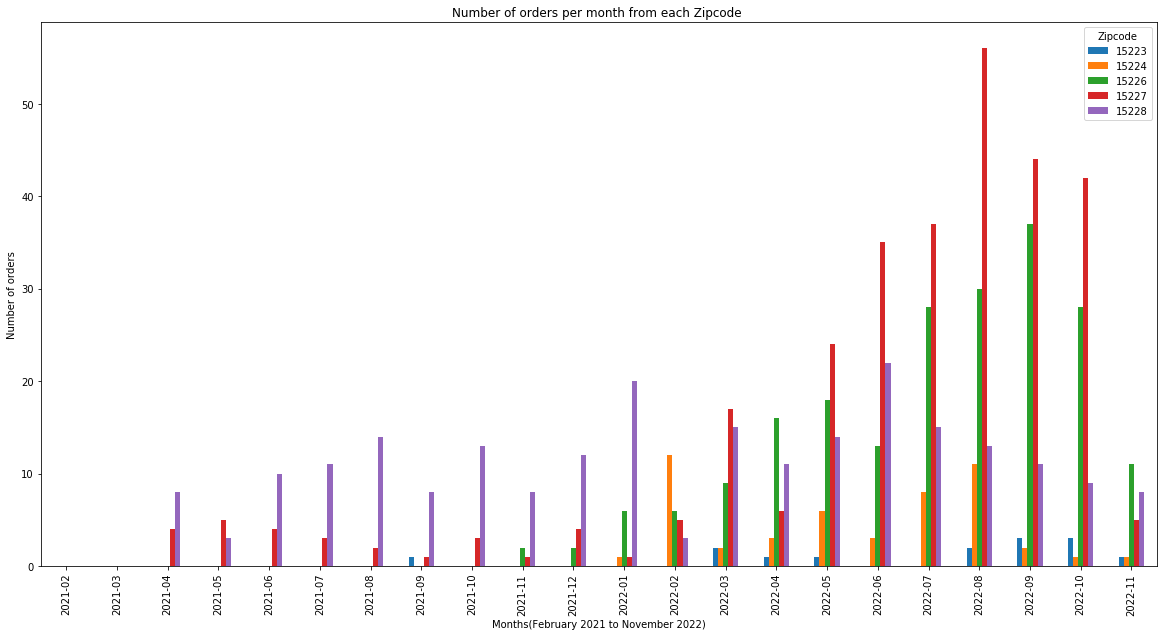

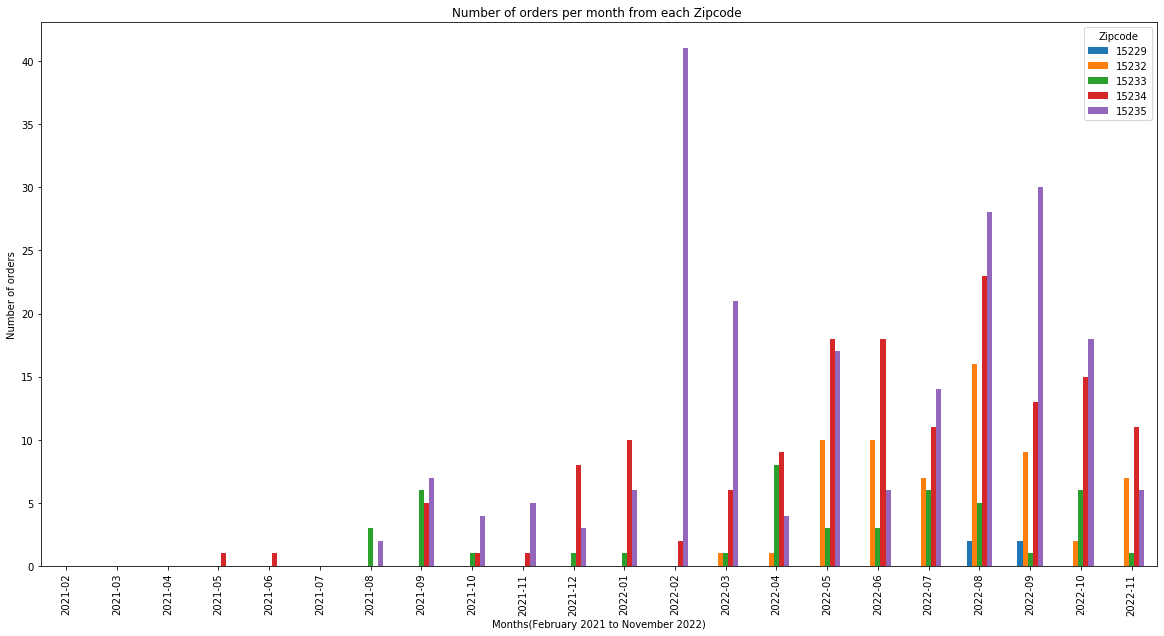

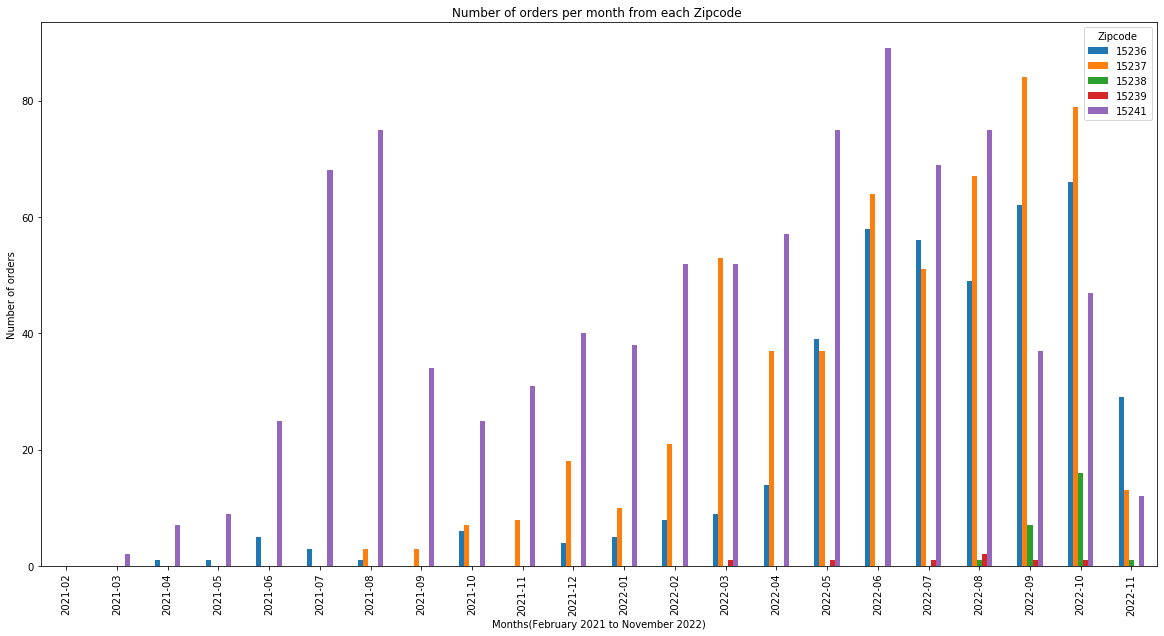

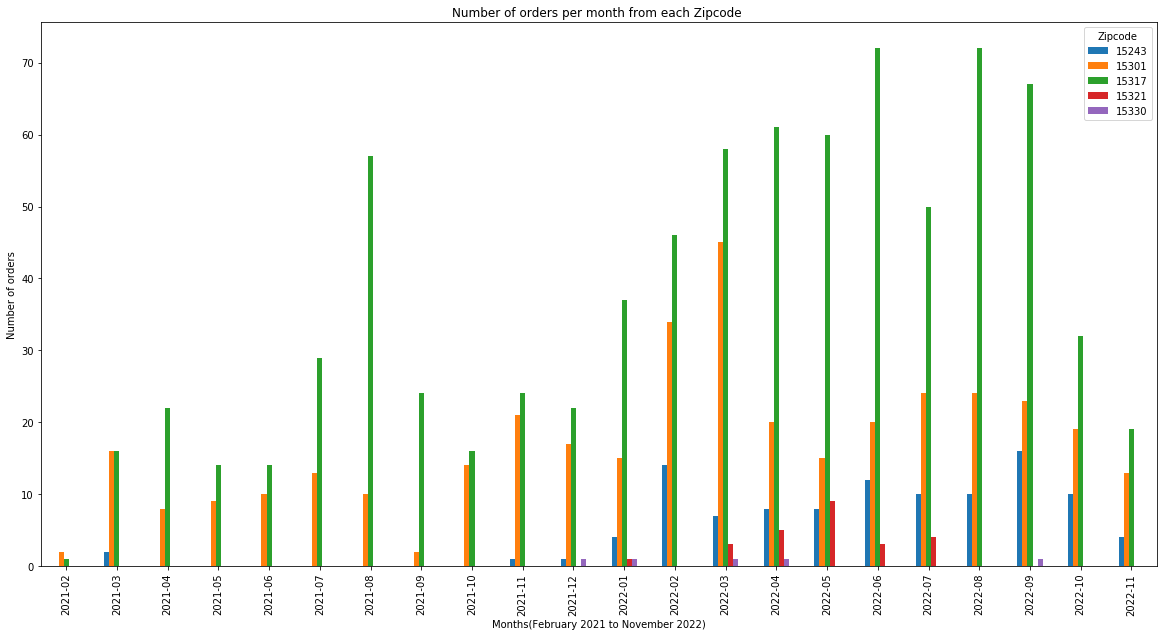

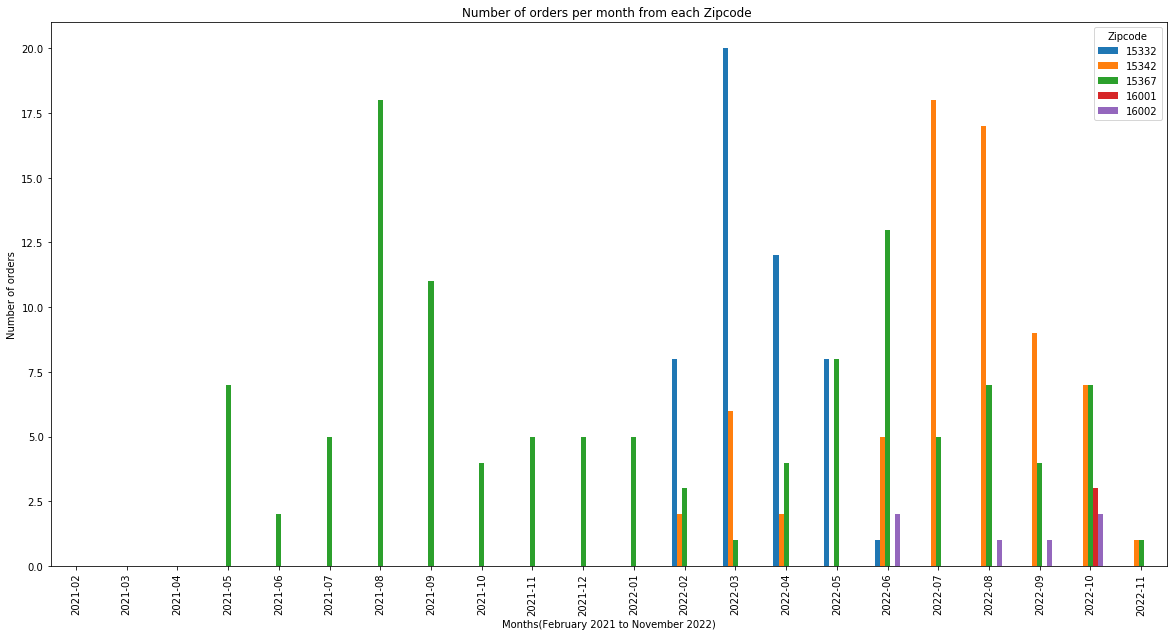

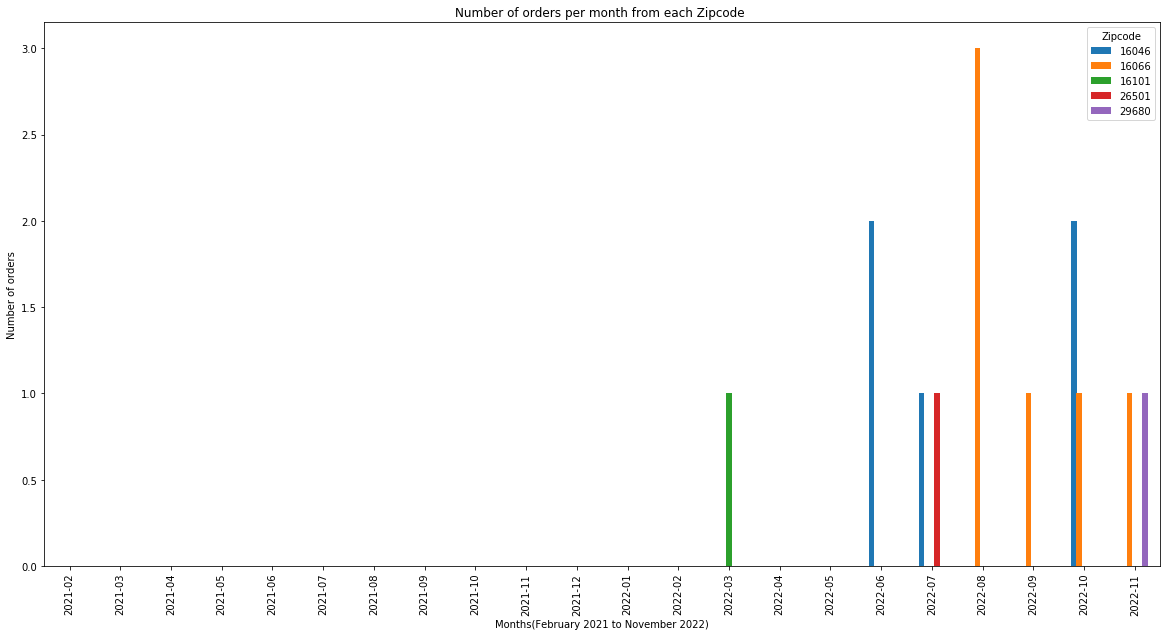

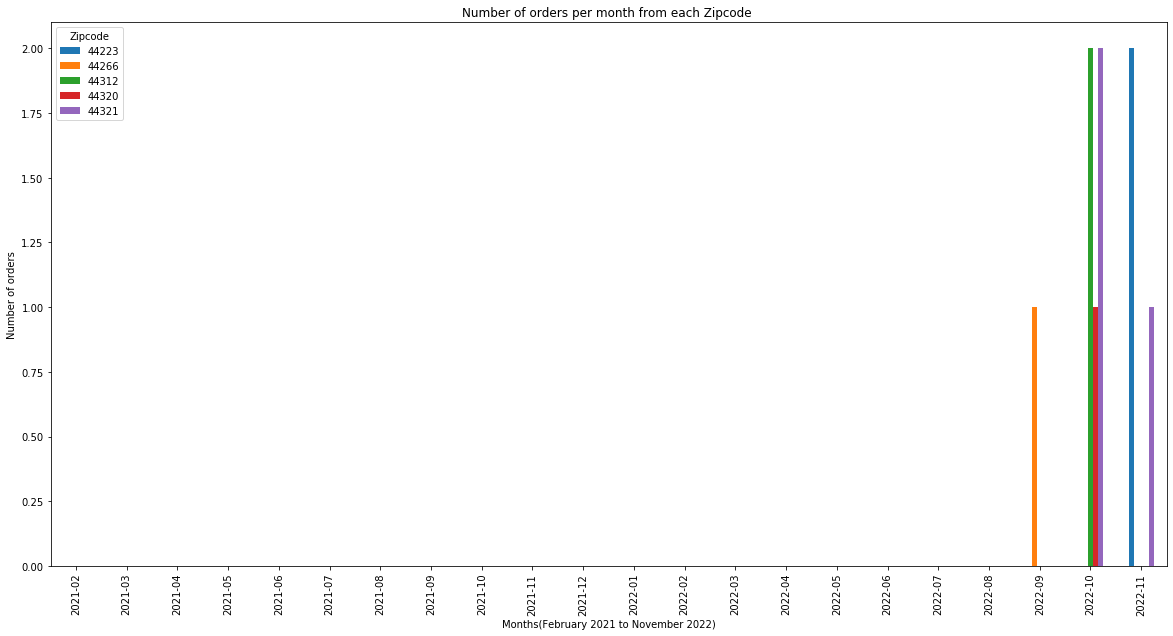

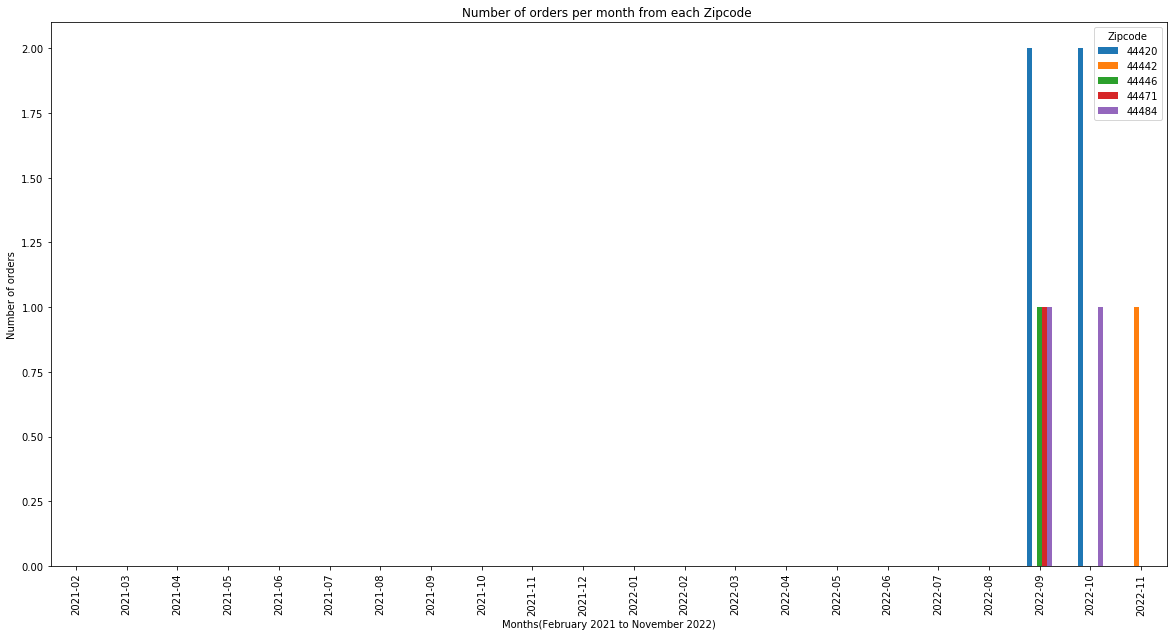

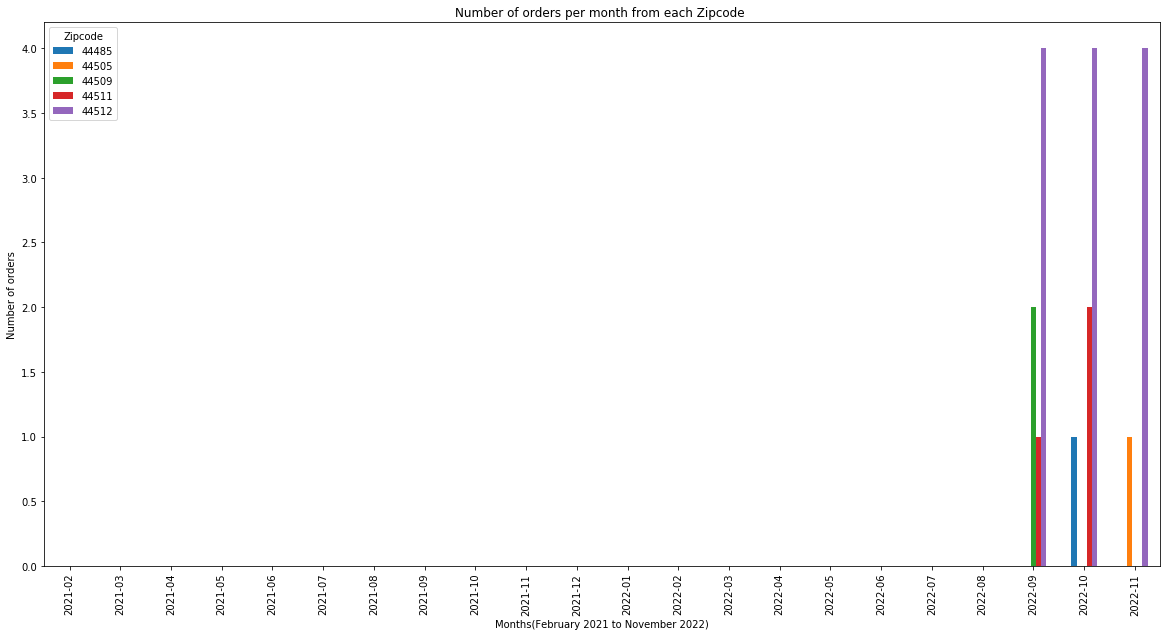

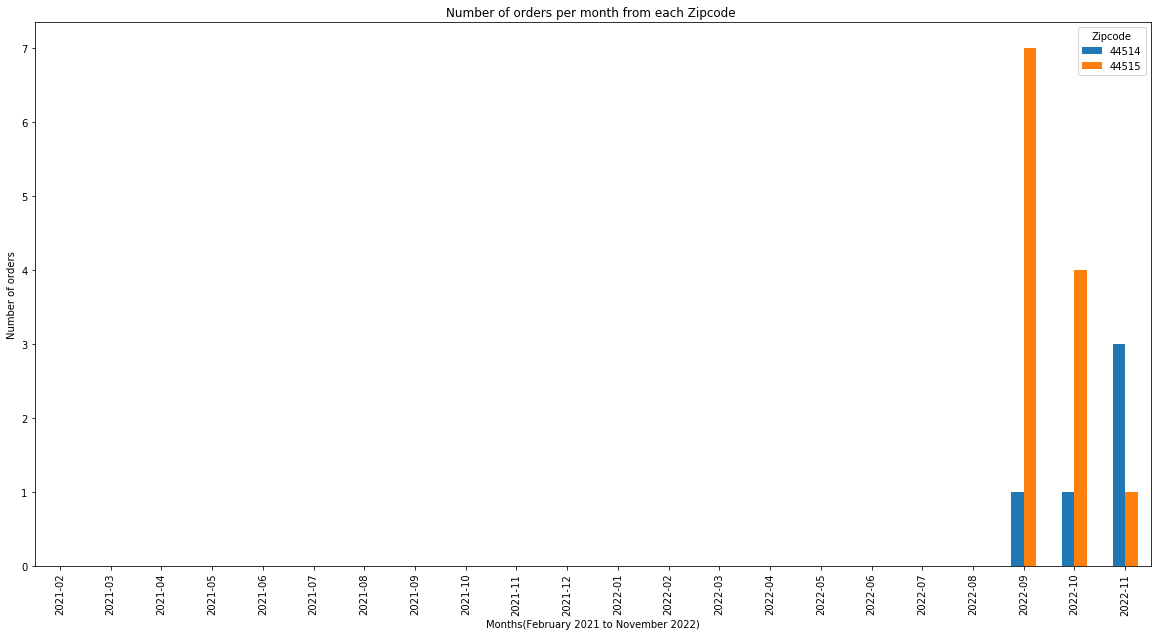

In [169]:
hil = out.transpose()
hil5 = hil.iloc[:, 0:5]
hil5.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil10 = hil.iloc[:, 5:10]
hil10.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil15 = hil.iloc[:, 10:15]
hil15.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil20 = hil.iloc[:, 15:20]
hil20.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil25 = hil.iloc[:, 20:25]
hil25.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil30 = hil.iloc[:, 25:30]
hil30.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil35 = hil.iloc[:, 30:35]
hil35.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil40 = hil.iloc[:, 35:40]
hil40.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil45 = hil.iloc[:, 40:45]
hil45.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil50 = hil.iloc[:, 45:50]
hil50.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil55 = hil.iloc[:, 50:55]
hil55.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil60 = hil.iloc[:, 55:60]
hil60.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil65 = hil.iloc[:, 60:65]
hil65.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil70 = hil.iloc[:, 65:70]
hil70.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil75 = hil.iloc[:, 70:75]
hil75.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil80 = hil.iloc[:, 75:80]
hil80.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil85 = hil.iloc[:, 80:85]
hil85.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil90 = hil.iloc[:, 85:90]
hil90.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil95 = hil.iloc[:, 90:95]
hil95.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')
hil97 = hil.iloc[:, 95:]
hil97.plot(title = 'Number of orders per month from each Zipcode ',figsize=(20,10),kind='bar',ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')


# 7. Is there a season factor?

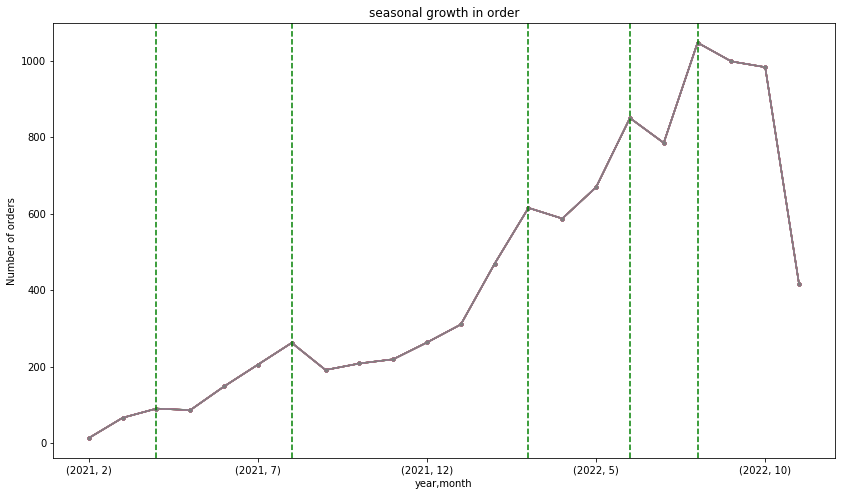

In [132]:
qf = df.groupby([df['Order date'].dt.year.rename('year'), df['Order date'].dt.month.rename('month')]).agg({'count'})
ax = qf.plot(legend=False,ylabel = 'Number of orders',title = 'seasonal growth in order',figsize=(14,8),style='.-')
xposition = [2,6, 13,16,18]
for xc in xposition:
    plt.axvline(x=xc, color='green', linestyle='--')
plt.show() 

### From the plot above we can see noticeable rise right before a decline in the number of orders on April 2021, August 2021, March 2022, June 2022 and August 2022. Now we only have roughly 2 years worth of data to work with but we can see a correlation in August of both years with high number of orders which brings us to the conclusion that number of orders peak at the end of summer (August).


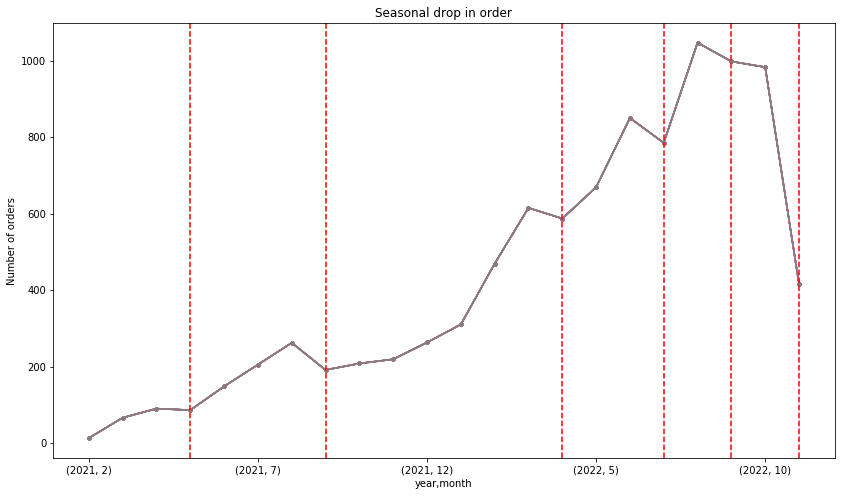

In [135]:
ay = qf.plot(legend=False,ylabel = 'Number of orders',title = 'Seasonal drop in order',figsize=(14,8),style='.-')
xposition = [3,7, 14,17,19,21]
for xc in xposition:
    plt.axvline(x=xc, color='red', linestyle='--')
plt.show() 

### From the plot above we can see noticeable rise right after a decline in the number of orders on May 2021, September 2021, April 2022, July 2022 and September 2022. 

# 8. From which warehouse do orders get delivered faster?

In [136]:
wf = df.groupby('Warehouse')['time_diff_days'].mean().round(2)
wf = pd.DataFrame(wf)
wf = wf.sort_values(by=['time_diff_days'], ascending=True)
wf.head(7)

,time_diff_days
Warehouse,
McKees Rocks,2.55
Washington Big Box,2.62
BD to MR,2.75
Washington,2.84
Mckees Rocks,3.01
Pittsburgh Mills,3.13
Butler,3.33
